In [169]:
import pandas
import datetime
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
%matplotlib inline

In [170]:
def get_rolling(country, total_population):
    url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
    data = pandas.read_csv(url)
    per = 100_000
    data = data[data["Country/Region"] == country]
    case_total = data.values.tolist()[0][4:]
    dates = list(data)[4:]  
    date_array = []
    cases_last_7_days = []
    
    i = len(case_total) - 1

    while i >= 7:
        cases_in_timeframe = case_total[i] - case_total[i - 7]
        date_array.append(dates[i])
        cases_last_7_days.append(cases_in_timeframe)

        #print(f"From {dates[i]} to {dates[i - 7]}")
        #print(f"Cases last 7 days: {cases_in_timeframe}")
        #print("-" * 23)

        i = i - 1
        
    cases_last_7_days_per_100k = [per * x / total_population for x in cases_last_7_days]
    date_array = [datetime.datetime.strptime(x, "%m/%d/%y") for x in date_array]
    
    return cases_last_7_days_per_100k, date_array

In [171]:
portugal = get_rolling("Portugal", 10_256_953)
sweden = get_rolling("Sweden", 10_099_265)
spain = get_rolling("Spain", 46_754_778)
croatia = get_rolling("Croatia", 4_105_267)
poland = get_rolling("Poland", 37_846_611)
romania = get_rolling("Romania",  19_229_990)

## Portugal Cases

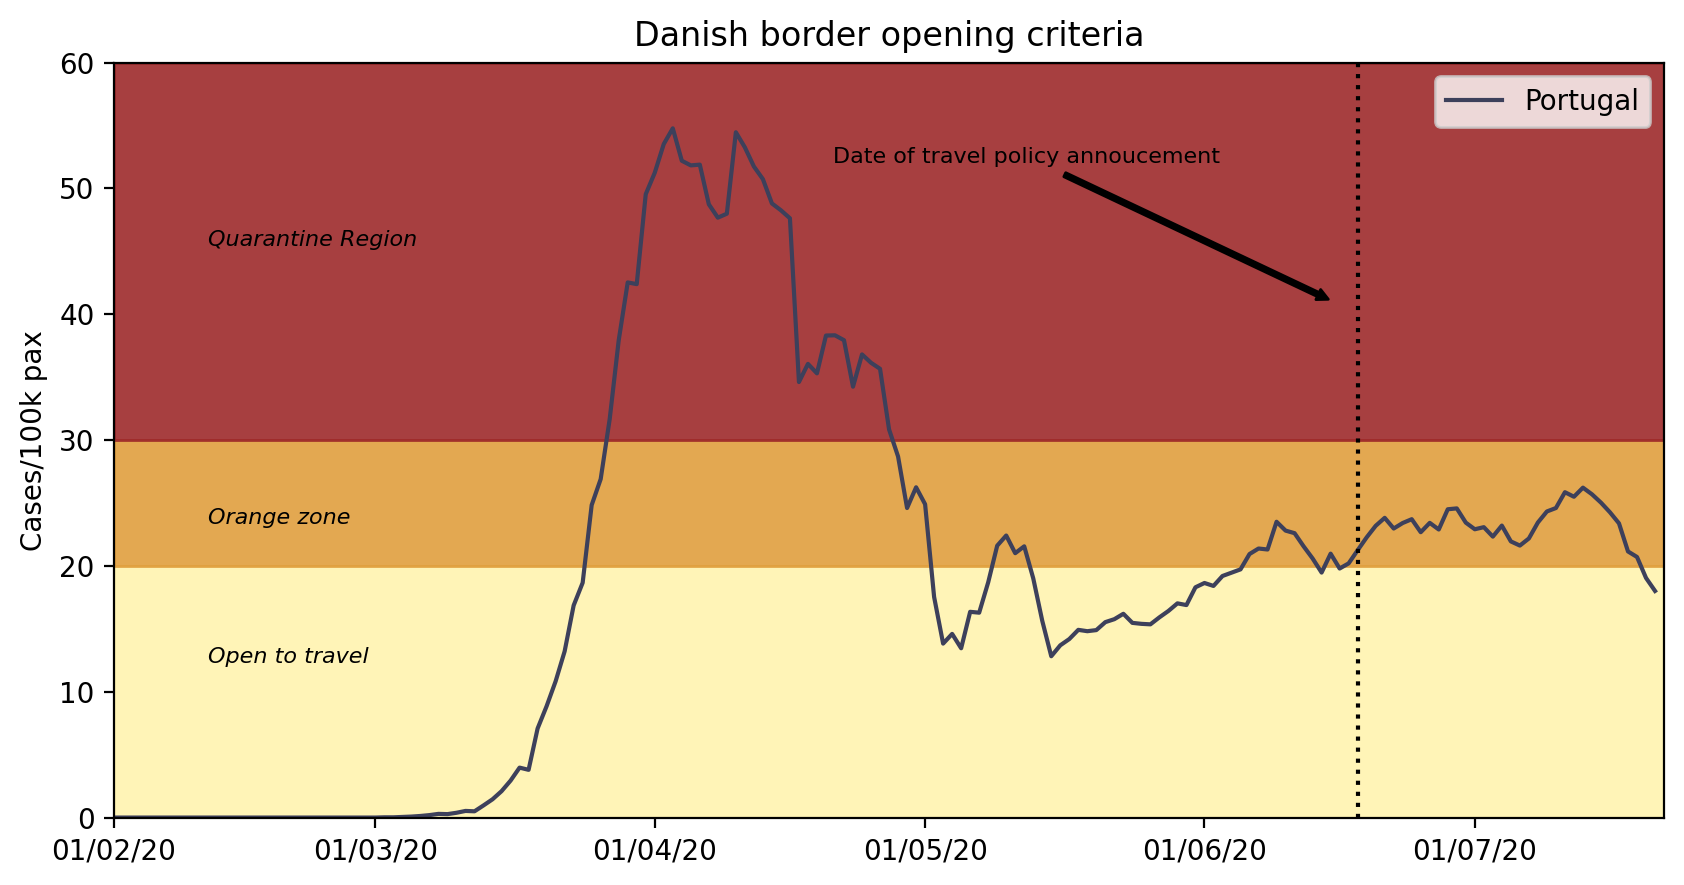

In [172]:
plt.figure(figsize=(10, 5), dpi=200)
plt.plot(portugal[1], portugal[0], label="Portugal", color="#3d405b", marker="", linestyle="-")
plt.axvline(datetime.datetime(2020, 6, 18), color="black", linestyle=":")
plt.axhspan(0, 20, alpha=0.9, color='#fff3b0')
plt.axhspan(20, 30, alpha=0.9, color='#e09f3e')
plt.axhspan(30, 60, alpha=0.9, color='#9e2a2b')
plt.title("Danish border opening criteria")
plt.annotate("Open to travel", xy=(75, 80), xycoords='figure points', style="italic", fontsize=8)
plt.annotate("Orange zone", xy=(75, 130), xycoords='figure points', style="italic", fontsize=8)
plt.annotate("Quarantine Region", xy=(75, 230), xycoords='figure points', style="italic", fontsize=8)
plt.annotate("Date of travel policy annoucement", 
             xy=(480, 210), 
             xytext=(300, 260), 
             arrowprops=dict(facecolor='black',arrowstyle="simple", ), 
             xycoords='figure points', 
             fontsize=8)
plt.ylabel("Cases/100k pax")
plt.legend()
plt.ylim(0, 60)
plt.xlim(datetime.date(2020, 2, 1), datetime.date.today())
ax = plt.gca()
date_form = DateFormatter("%d/%m/%y")
ax.xaxis.set_major_formatter(date_form)
plt.xticks(rotation="0")
plt.show()

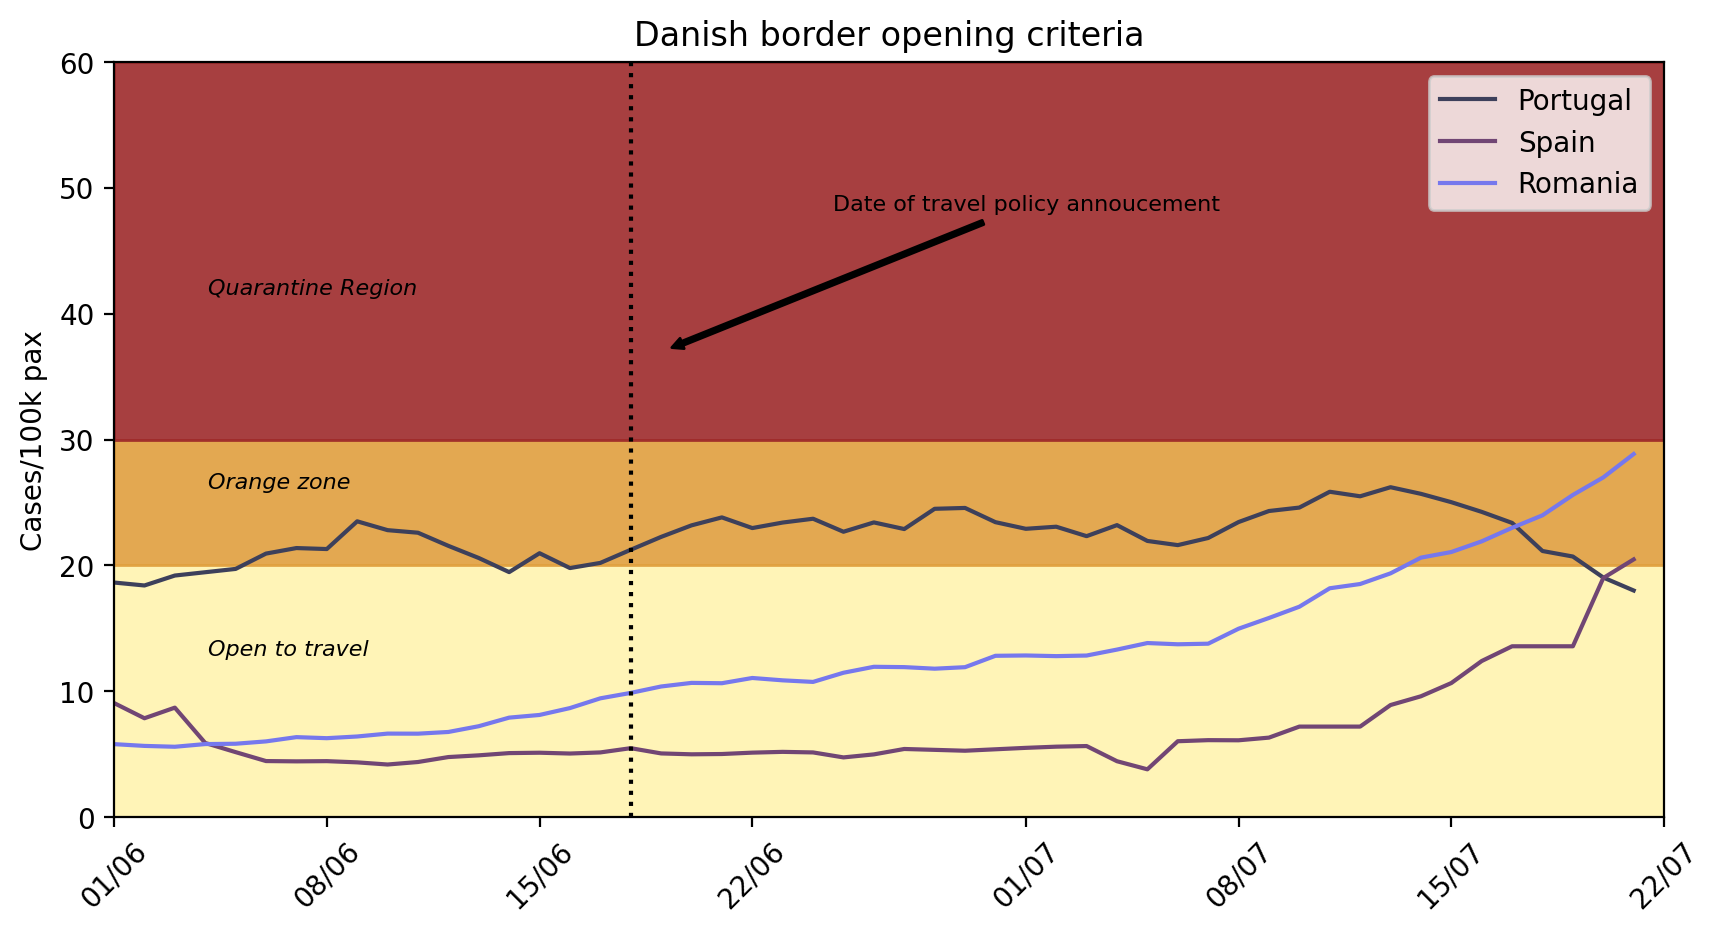

In [175]:
plt.figure(figsize=(10, 5), dpi=200)
plt.plot(portugal[1], portugal[0], label="Portugal", color="#3d405b", marker="", linestyle="-")
plt.plot(spain[1], spain[0], label="Spain", color="#714674", marker="", linestyle="-")
plt.plot(romania[1], romania[0], label="Romania", color="#7678ed", marker="", linestyle="-")
plt.axvline(datetime.datetime(2020, 6, 18), color="black", linestyle=":")
plt.axhspan(0, 20, alpha=0.9, color='#fff3b0')
plt.axhspan(20, 30, alpha=0.9, color='#e09f3e')
plt.axhspan(30, 60, alpha=0.9, color='#9e2a2b')
plt.title("Danish border opening criteria")
plt.annotate("Open to travel", xy=(75, 100), xycoords='figure points', style="italic", fontsize=8)
plt.annotate("Orange zone", xy=(75, 160), xycoords='figure points', style="italic", fontsize=8)
plt.annotate("Quarantine Region", xy=(75, 230), xycoords='figure points', style="italic", fontsize=8)
plt.annotate("Date of travel policy annoucement", 
             xy=(240, 210), 
             xytext=(300, 260), 
             arrowprops=dict(facecolor='black',arrowstyle="simple", ), 
             xycoords='figure points', 
             fontsize=8)
plt.ylabel("Cases/100k pax")
plt.legend()
plt.ylim(0, 60)
plt.xlim(datetime.date(2020, 6, 1), datetime.date.today())
ax = plt.gca()
date_form = DateFormatter("%d/%m")
ax.xaxis.set_major_formatter(date_form)
plt.xticks(rotation="45")
plt.show()